In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

## Import Dataset

In [2]:
df = pd.read_csv(os.getcwd()+'/Data/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


## Data Pre-processing

In [4]:
df = df.dropna()

In [5]:
df = df[~df['review'].str.isspace()]

In [6]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [7]:
cv = CountVectorizer(stop_words='english')

In [8]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [9]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


## Train Test Split and TF - IDF Vectorizer

In [10]:
X = df['review']
y = df['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
tfidf = TfidfVectorizer(stop_words='english')

In [13]:
tfidf.fit(X_train)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

## Model implementation

In [14]:
model = MultinomialNB()

In [15]:
model.fit(X_train,y_train)

MultinomialNB()

In [16]:
base_pred = model.predict(X_test)

## Evaluation

In [17]:
y_pred = model.predict(X_test)

In [18]:
metrics.accuracy_score(y_test,y_pred)

0.8118556701030928

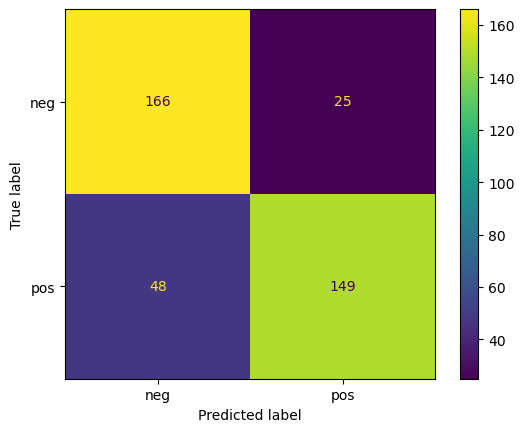

In [19]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_).plot()

In [20]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



## Grid Search

In [21]:
model = MultinomialNB()

In [22]:
parametros = {"alpha":[1,2,5,10,15,20,30,50,100],'fit_prior':[True, False]}

In [23]:
grid_model = GridSearchCV(model,param_grid= parametros, cv = 5, scoring='accuracy', n_jobs=-1)

In [24]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [1, 2, 5, 10, 15, 20, 30, 50, 100],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [25]:
grid_model.best_params_

{'alpha': 1, 'fit_prior': True}

In [26]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [27]:
metrics.accuracy_score(y_test,y_pred)

0.8118556701030928

array(['neg', 'pos'], dtype=object)

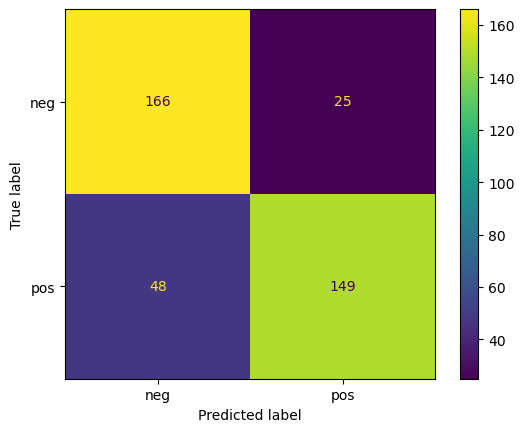

In [36]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= y.value_counts().index.values ).plot()

In [37]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



## Elbow

In [38]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = MultinomialNB( alpha=n)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - metrics.accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

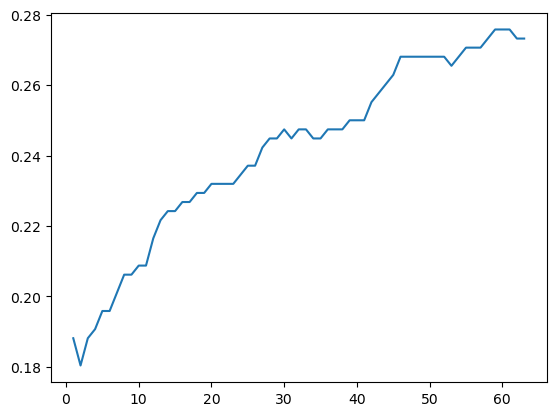

In [39]:
plt.plot(range(1,64),errors)

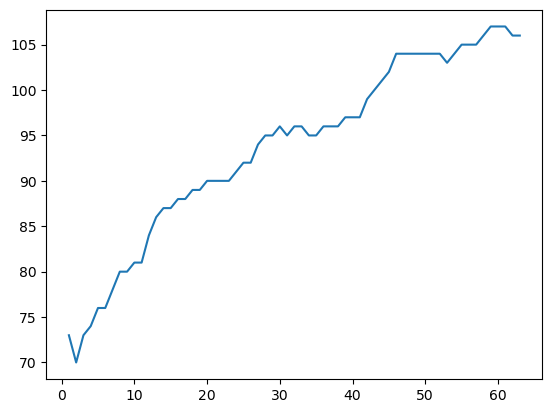

In [40]:
plt.plot(range(1,64),misclassifications)